In [9]:
from korbash_lib import PowerMeter, TensionGauge, Motor, MotorSystem, Puller, start, end, Everage, Exp_everage
import pandas as pd
import numpy as np
import time
from scipy import stats

In [2]:
pl = Puller()

[(21, 90113195), (21, 90113196), (21, 90113197)]


In [3]:
pl.tg.ReadTension(memory=False, memoryTime=False)

-7.4303456119018545

In [6]:
pl.tg.SetZeroWeight(2)
print('seted ', pl.tg.zeroWeight)

seted  7.592489406371549


In [3]:
#pl.ms.MoveToStart(L=35, dL=35)
#pl.ms.motorM.MoveTo(15)
pl.ms.motorR.MoveTo(40)

0

In [7]:
x=np.array([])
W=np.array([])
w=np.hstack((np.arange(10,221,10), np.arange(220,9,-10)))
for iw in w:
    pl.SetW(iw,0.05,277)
    pl.ms.motorR.Getposition()
    pl.ms.motorL.Getposition()
    t0=time.time()
    W_zn=pl.tg.ReadMean(2)
    dx=200-(pl.ms.motorR.points[-1]+pl.ms.motorL.points[-1])
    x=np.append(x,dx)
    W=np.append(W,W_zn)
data = pd.DataFrame({
    'dx': x,
    'w': W
})

-1.0105141471306889    -11.010514147130689    0.039749148545598155
8.229708373217084    -1.7702916267829156    0.006390944501021356
9.65400911960008    -0.34599088039992054    0.0012490645501802185
9.939782340318246    -0.0602176596817543    0.0002173922732193296
10.021641311445459    -9.978358688554541    0.03602295555434853
19.389104267615533    -0.610895732384467    0.002205399755900603
19.900288221201272    -0.09971177879872783    0.00035997032057302465
19.934573751490564    -10.065426248509436    0.03633727887548533
29.44746298693004    -0.5525370130699585    0.0019947184587363123
29.97811773549488    -0.021882264505119764    7.899734478382587e-05
30.044965449312894    -9.955034550687106    0.03593875289056717
39.584415388772776    -0.41558461122722434    0.0015003054556939506
39.96347609071459    -0.03652390928540683    0.00013185526817836401
40.05708103055203    -9.942918969447973    0.03589501433013709
49.59514019894197    -0.40485980105803065    0.0014615877294513742
50.007836

<AxesSubplot:xlabel='dx'>

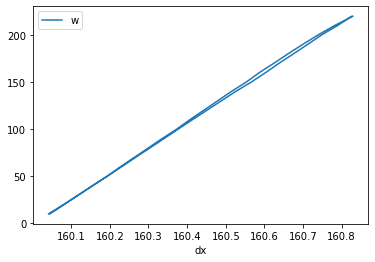

In [15]:
data.plot(x='dx',y='w')

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['dx'],data['w'])
slope

270.81009441344213

In [27]:
del pl





In [3]:
mg=MotorSystem()
end(mg.motorR,mg.motorL,mg.motorM,10,10)

[]


Exception: Could not initialize device: Unknown serial number.

In [17]:
w=np.hstack((np.arange(10,21,10), np.arange(20,9,-10)))
w

array([10, 20, 20, 10])